# Reading from STAC
Demonstrates a STAC reader class to read from FIM-C s3 catalog to download asset files.

Requirements:
- `.env` file with AWS credentials `AWS_ACCESS_KEY_ID`, `AWS_SECRET_ACCESS_KEY`, `AWS_SESSION_TOKEN` for NGWPC `Data` AWS account
- Collection, item, and asset file must be known

In [ ]:
import os

import matplotlib.pyplot as plt
import rasterio
from dotenv import load_dotenv

from trainer.datasets.utils_stac import STACReader

load_dotenv()

True

In [ ]:
reader = STACReader(bucket="fimc-data", catalog="s3://fimc-data/benchmark/stac-bench-cat/catalog.json")

reader includes an attribute `root_catalog` to directly access catalog

In [8]:
collections = list(reader.root_catalog.get_collections())

print(f"Number of collections: {len(collections)}")
print("Collections IDs:")
for collection in collections:
    print(f"- {collection.id}")

Number of collections: 10
Collections IDs:
- gfm-expanded-collection
- hwm-collection
- nws-fim-collection
- usgs-fim-collection
- ble-collection
- gfm-collection
- gfm-expanded-collection
- gfm-expanded-collection
- gfm-expanded-collection
- ripple-fim-collection


In [13]:
collection = reader.root_catalog.get_child("gfm-collection")
collection

<Collection id=gfm-collection>

In [9]:
items = list(collection.get_items())
items[0]

<Item id=ble_05119_Pulaski_ripple_0_10_3_f2fim_0_3_0>

Includes a `read_stac` method for reading a specific `asset_id` (file) from a `collection` and an `item`. An output directory must be specified. If no `output_name` given, the file will default to the asset's file name.

Items can be identified via FIM-C Benchmark STAC API

Note: STACs can have an item searched from the root catalog, but performance is very poor on a large catalog. 

In [ ]:
if not os.path.isdir("data"):
    os.mkdir("data")

reader.read_stac(
    collection="gfm-collection",
    item_id="DFO-4230_tile-S1A_IW_GRDH_1SDV_20150316T235500_20150316T235525_005064_0065C2_6FB7",
    asset_id="E090N030T3_Observed_Flood_Extent",
    output_dir="./data",
)

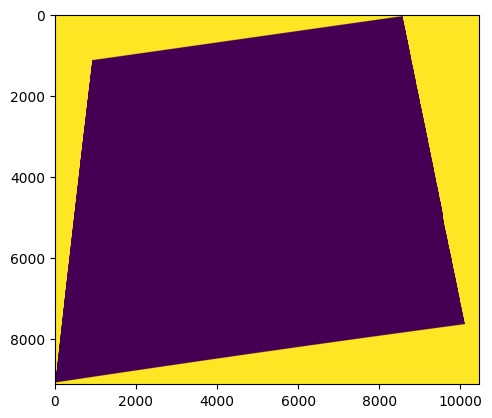

In [6]:
with rasterio.open(
    "./data/NA_E090N030T3_ENSEMBLE_FLOOD_20150316T235500_VV_NA020M_E090N030T3_20150316.tif"
) as src:
    plt.imshow(src.read(1))

In [ ]:
reader.read_stac(
    collection="gfm-collection",
    item_id="DFO-4230_tile-S1A_IW_GRDH_1SDV_20150316T235500_20150316T235525_005064_0065C2_6FB7",
    asset_id="NWM_v3_flowfile",
    output_dir="./data",
    output_name="nwm_flow_test.csv",
)